<a href="https://colab.research.google.com/github/Qlayn810/Project_cuoi_ky_AI/blob/main/Project_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TRAIN MODEL

In [ ]:
import os
from PIL import Image
import numpy as np

from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam, SGD

from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

In [ ]:
# tạo catagory
dick={"Thanh long":[1,0,0,0,0,0,0,0,0,0],"Kiwi":[0,1,0,0,0,0,0,0,0,0],
      "Cherry Rainier":[0,0,1,0,0,0,0,0,0,0],"Cactus fruit":[0,0,0,1,0,0,0,0,0,0],
      "Blueberry":[0,0,0,0,1,0,0,0,0,0],"Beetroot":[0,0,0,0,0,1,0,0,0,0],
      "Banana":[0,0,0,0,0,0,1,0,0,0],"Avocado":[0,0,0,0,0,0,0,1,0,0],
      "Apricot":[0,0,0,0,0,0,0,0,1,0],"Apple Braeburn":[0,0,0,0,0,0,0,0,0,1]}

In [ ]:
def getData(dirData, x):
  for i in os.listdir(dirData):
    i_path=os.path.join(dirData,i) 
    lst=[]  
    for j in os.listdir(i_path):
      j_path=os.path.join(i_path,j) 
      label=j_path.split('/')[5]
      img=np.array(Image.open(j_path))
      lst.append((img,dick[label])) 
    x.extend(lst) 
  return x

In [ ]:
train='drive/MyDrive/Project_AI/Data/Train'
validation='drive/MyDrive/Project_AI/Data/Validation'

data_train = []
data_validation = []

data_train=getData(train,data_train)
data_validation=getData(validation,data_validation)

print(len(data_train))
print(len(data_validation))

2267
2205


In [ ]:
x_train=[]
x_validation=[]

y_train=[]
y_validation=[]

x_train=np.array([x[0] for _, x in enumerate(data_train)])
y_train=np.array([x[1] for _, x in enumerate(data_train)])

x_validation=np.array([x[0] for _, x in enumerate(data_validation)])
y_validation=np.array([x[1] for _, x in enumerate(data_validation)])

x_train=x_train.astype('float32')
x_validation=x_validation.astype('float32')

x_train/=255
x_validation/=255

print(x_train.shape)
print(x_validation.shape)

(2267, 100, 100, 3)
(2205, 100, 100, 3)


In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',
                 padding='Same',input_shape=(100,100,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',
                 padding='Same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',
                 padding='Same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',
                 padding='Same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',
                 padding='Same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',
                 padding='Same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10,activation='softmax'))

opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                    

In [ ]:
history=model.fit(x_train,y_train,epochs=500,batch_size=128,validation_data=(x_validation,y_validation),verbose=1,callbacks=[EarlyStopping(monitor='val_loss',patience=20)])

Epoch 1/500
18/18 [==============================] - 6s 334ms/step - loss: 2.6991 - accuracy: 0.3114 - val_loss: 1.5493 - val_accuracy: 0.4372
Epoch 2/500
18/18 [==============================] - 6s 320ms/step - loss: 0.7249 - accuracy: 0.7556 - val_loss: 0.1338 - val_accuracy: 0.9705
Epoch 3/500
18/18 [==============================] - 6s 324ms/step - loss: 0.0796 - accuracy: 0.9749 - val_loss: 0.0457 - val_accuracy: 0.9937
Epoch 4/500
18/18 [==============================] - 6s 325ms/step - loss: 0.0272 - accuracy: 0.9907 - val_loss: 0.0646 - val_accuracy: 0.9710
Epoch 5/500
18/18 [==============================] - 6s 329ms/step - loss: 0.0055 - accuracy: 0.9996 - val_loss: 0.0466 - val_accuracy: 0.9819
Epoch 6/500
18/18 [==============================] - 6s 334ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0510 - val_accuracy: 0.9760
Epoch 7/500
18/18 [==============================] - 6s 335ms/step - loss: 6.3020e-04 - accuracy: 1.0000 - val_loss: 0.0577 - val_accuracy: 0.

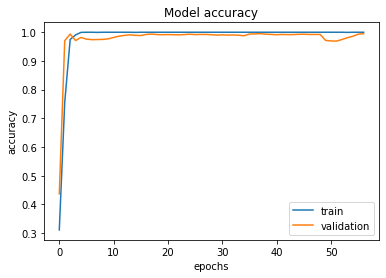

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','validation'])
plt.show()

In [ ]:
model.save('project.h5')

# KẾT QUẢ MODEL

In [ ]:
from keras.models import Sequential, load_model
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

In [ ]:
model=load_model('drive/MyDrive/Project_AI/project.h5')

In [ ]:
hinh=["Thanh long", "Trai khac"]

In [ ]:
def test(link):
  img=load_img(link,target_size=(100,100,3))
  plt.imshow(img)
  img=img_to_array(img)
  img=(img.reshape(1,100,100,3))
  img=img/255
  if np.argmax(model.predict(img))!=0:
    a=1
  else: 
    a=0
  return a 

	 HINH THU NGHIEM


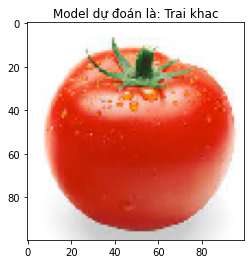

In [ ]:
a=test('drive/MyDrive/Project_AI/Data/Test/1.jpg')
plt.title("Model dự đoán là: " + str(hinh[a]))
print("\t HINH THU NGHIEM")

	 HINH THU NGHIEM


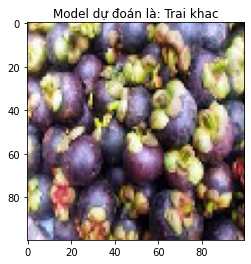

In [ ]:
a=test('drive/MyDrive/Project_AI/Data/Test/2.jpg')
plt.title("Model dự đoán là: " + str(hinh[a]))
print("\t HINH THU NGHIEM")

	 HINH THU NGHIEM


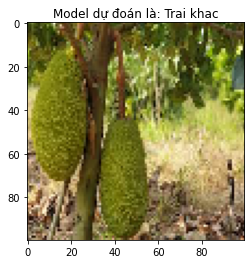

In [ ]:
a=test('drive/MyDrive/Project_AI/Data/Test/3.jpg')
plt.title("Model dự đoán là: " + str(hinh[a]))
print("\t HINH THU NGHIEM")

	 HINH THU NGHIEM


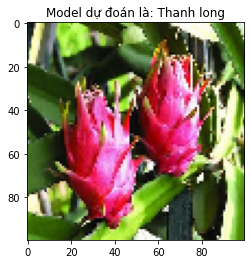

In [ ]:
a=test('drive/MyDrive/Project_AI/Data/Test/4.jpg')
plt.title("Model dự đoán là: " + str(hinh[a]))
print("\t HINH THU NGHIEM")